<a href="https://colab.research.google.com/github/neha1-1/SCT_DS_2/blob/main/intern2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

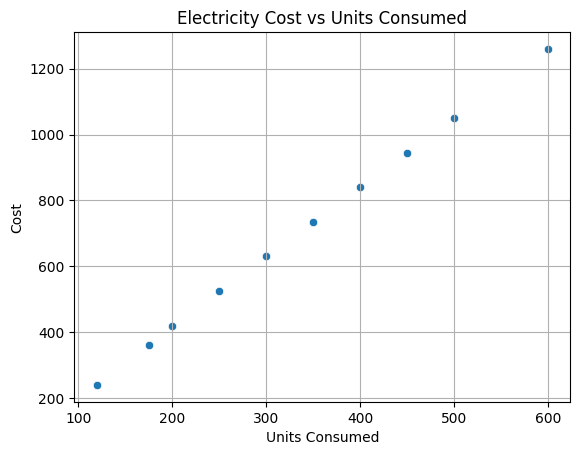

Mean Squared Error: 19.684243052254256
R² Score: 0.9998542515207386
Predicted cost for 700 units: ₹1477.36
Predicted cost for 800 units: ₹1689.88


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


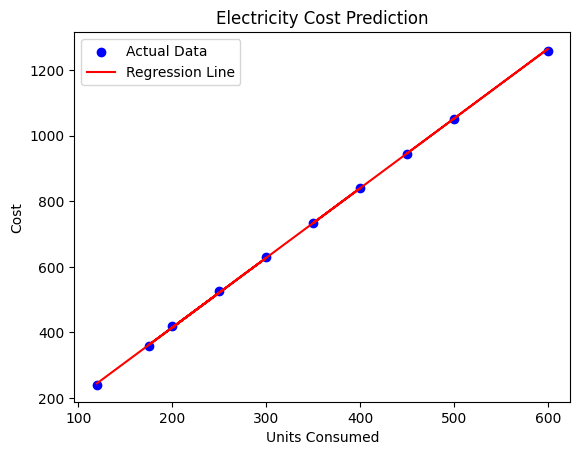

In [ ]:
# Install required libraries (if not already installed)
!pip install pandas scikit-learn matplotlib seaborn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Sample Data: Electricity Consumption and Cost
# You can replace this with your real dataset
data = {
    'Units_Consumed': [120, 250, 175, 300, 200, 400, 350, 500, 600, 450],
    'Cost': [240, 525, 360, 630, 420, 840, 735, 1050, 1260, 945]
}

df = pd.DataFrame(data)

# Visualize the data
sns.scatterplot(data=df, x='Units_Consumed', y='Cost')
plt.title("Electricity Cost vs Units Consumed")
plt.xlabel("Units Consumed")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

# Prepare data for model
X = df[['Units_Consumed']]  # Independent variable
y = df['Cost']              # Dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Predicting new values
new_units = np.array([[700], [800]])  # Predict for 700 and 800 units
predicted_costs = model.predict(new_units)

for units, cost in zip(new_units.flatten(), predicted_costs):
    print(f"Predicted cost for {units} units: ₹{cost:.2f}")

# Plot regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Electricity Cost Prediction')
plt.xlabel('Units Consumed')
plt.ylabel('Cost')
plt.legend()
plt.show()
